# SIQR Model

O isolamento/quarentena é um procedimento para controlar o avanço da doença.
Foi, provavelmente, um dos primeiros métodos de controle utilizados. Uma
epidemia é um surto de uma doenã em um curto período de tempo. Inicialmente,
olharemos para os modelos SIR, com a adição de um novo compartimento, $Q$.
Assumimos, inicialmente, que aqueles em quarentena não infectam suscetíveis. 

Seja $S(t), I(t), Q(t) ~e~ R(t) $ o número de suscetíveis, infectados,
removidos e em quarentena no tempo $t$. Seja $\beta$ o número médio de
contatos suficientes para transmissão,  então $\beta\frac{I}{S + I + R}S$ é o
número de novos casos e é chamada de incidência padrão. Podemos aplicar a
lei das massas da mesma forma ($\beta SI$). 

## The model

$$\min_u \int_0^T CI(t) + (u(t)I(t))^2 dt $$

$$ S'(t) = A - \beta\frac{SI}{S + I + R} - dS, $$

$$ I'(t) = \beta\frac{SI}{S + I + R} - (d + \alpha_1 + \gamma + u)I $$

$$ Q'(t) = uI - (\alpha_2 + d + \epsilon)Q $$

$$ R'(t) = \gamma I + \epsilon Q - dR $$

$$S(0) = S_0 \geq 0, I(0) = I_0 \geq 0, Q(0) = 0, R(0) = R_0 \geq 0$$

$$ 0 \leq u(t) \leq 1 $$


#### importing modules

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
sp.init_printing(use_unicode = True)

In [6]:
S,I,Q,R,u,l1,l2,l3,l4,C, A, b, d, a1, g, a2, e = sp.symbols('S I Q R u l1 l2 l3 l4 C A b d a1 g a2 e')
H = -C*I - I*u + l1*(A - b*(S*I/(S + I + R)) - d*S) + \
                 l2*(b*(S*I/(S + I + R)) - (d + a1 + g + u)*I) + \
                 l3*(u*I - (a2 + d + e)*Q) +  \
                 l4*(g*I + e*Q - d*R) 

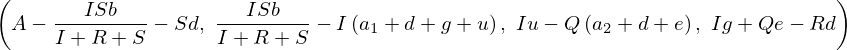

In [7]:
sp.diff(H,l1), sp.diff(H,l2), sp.diff(H,l3), sp.diff(H,l4)

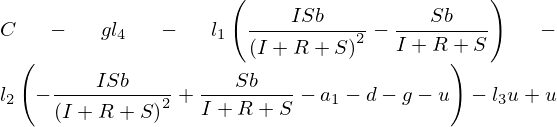

In [11]:
dl1 = (-1)*sp.diff(H,S)
dl2 = (-1)*s, dl3p.diff(H,I)
dl3 = (-1)*sp.diff(H,Q)
dl4 = (-1)*sp.diff(H,R)
dl2

In [12]:
dl3

In [9]:
du = H.diff(u)
du

$$ \frac{\partial H}{\partial u} > 0 \implies u = 1 \implies \lambda_3 - \lambda_2 > 2$$

$$ \frac{\partial H}{\partial u} < 0 \implies u = 0 \implies \lambda_3 - \lambda_2 < 0 $$

$$ \frac{\partial H}{\partial u} = 0 \implies 0 \leq u \leq 1 \implies u = \frac{\lambda_3 - \lambda_2}{2} \implies 0 \leq \frac{\lambda_3 - \lambda_2}{2} \leq 1 $$

$$u = \max(0, \min(1,\frac{\lambda_3 - \lambda_2}{2}))$$

$$R_q(t) = \frac{\beta}{\gamma + u(t) + d + \alpha_1} $$

Se $R_q \leq 1 $ o modelo converge para $(A/d, 0, 0, 0)$

Consideremos o experimento em que: 
$C = 1, A = 1, b = 2, d = 0.02, a1 = 0.5, g = 0.1, a2 = 0.01, e = 0.4$

Nesse caso: 

In [24]:
Rq = b/(g + d + a1)
Rq = Rq.subs({b:2, g:0.1, d: 0.02, a1: 0.5})  ## Sem controle

Rq_u1 = b/(g + d + u + a1)
Rq_u1 = Rq_u.subs({b:2, g:0.1, u: 1, d: 0.02, a1: 0.5})

Rq_u2 = b/(g + d + u + a1)
Rq_u2 = Rq_u2.subs({b:1, g:0.1, u: 1, d: 0.02, a1: 0.5})

Rq, Rq_u1, Rq_u2

In [13]:
from optimal_control_class import OptimalControl as OC

Iteration 1
The minimum is -172.1069634294383
Iteration 2
The minimum is -38.23312748171709
Iteration 3
The minimum is -130.74139979995624
Iteration 4
The minimum is -318.939376857525
Iteration 5
The minimum is -285.8461929330407
Iteration 6
The minimum is -139.15332989080252
Iteration 7
The minimum is -59.713964599622635
Iteration 8
The minimum is -26.247095073809433
Iteration 9
The minimum is -11.859774562813657
Iteration 10
The minimum is -5.228387414617262
Iteration 11
The minimum is -2.043003563511739
Iteration 12
The minimum is -0.4662184891936787
Iteration 13
The minimum is -0.029593971616228884
Iteration 14
The minimum is -0.006334224536654137
Iteration 15
The minimum is 0.005349243713236671


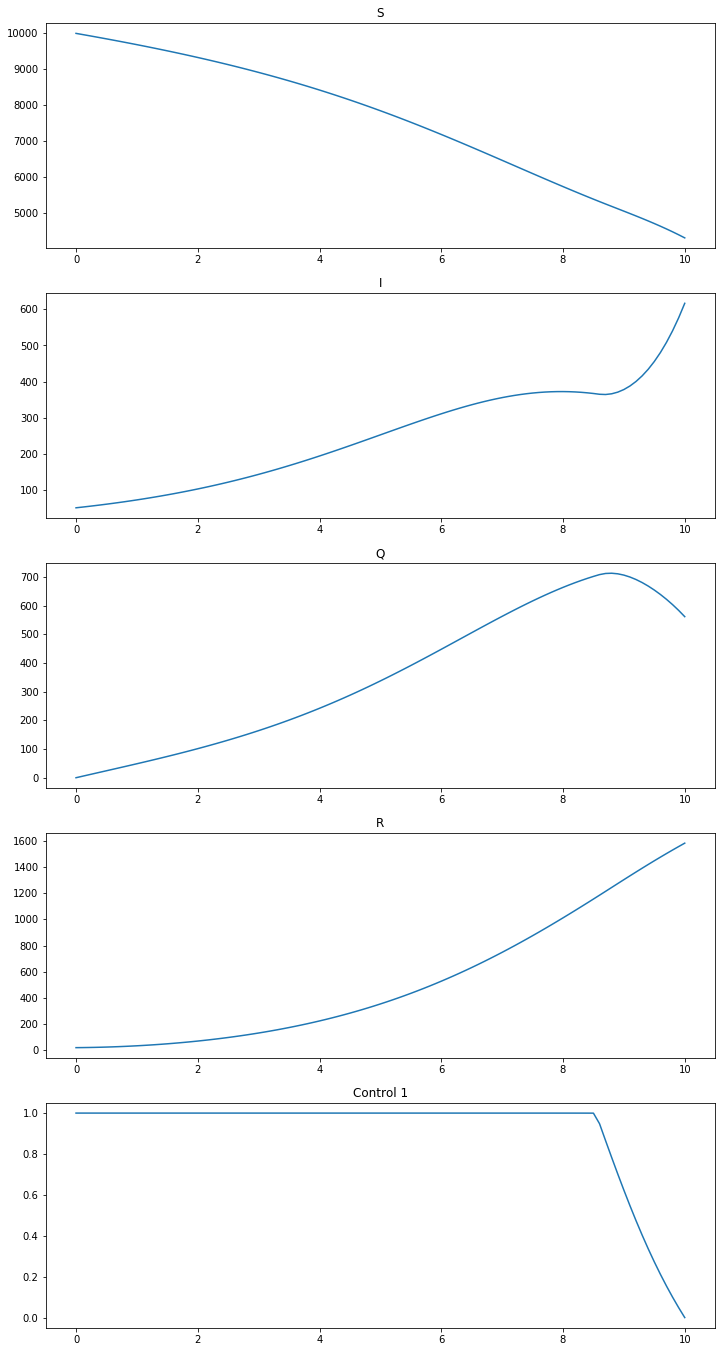

In [14]:
sX = list(sp.symbols('S I Q R'))
sAdj = list(sp.symbols('l1 l2 l3 l4'))
sU = [sp.symbols('u')]
sConst = list(sp.symbols('C A b d a1 g a2 e'))
fU = [sp.Max(0,sp.Min(1, (sAdj[2] - sAdj[1])/2))]
T = 10
final = [0,0,0,0]
initial = [10000,50,0,20]
const = [1, 1, 2, 0.02, 0.5, 0.1,0.01,0.4]
Problem = OC(H, sX, sAdj, sU, fU, sConst, const, T, initial, final)

X, U = Problem.plot('S','I','Q','R')

Iteration 1
The minimum is -1421.5097891458588
Iteration 2
The minimum is -1004.9991690727749
Iteration 3
The minimum is -117.08978012660998
Iteration 4
The minimum is -25.965724587453796
Iteration 5
The minimum is -8.532486663052829
Iteration 6
The minimum is -3.3244085276306543
Iteration 7
The minimum is -1.3576254526925868
Iteration 8
The minimum is -0.5079924251701824
Iteration 9
The minimum is -0.11393625269282398
Iteration 10
The minimum is -0.0022370985098151422
Iteration 11
The minimum is -0.0009136632353157072
Iteration 12
The minimum is -0.00025888487310495023
Iteration 13
The minimum is -2.3135223384643277e-06
Iteration 14
The minimum is 1.4185279633347156e-06


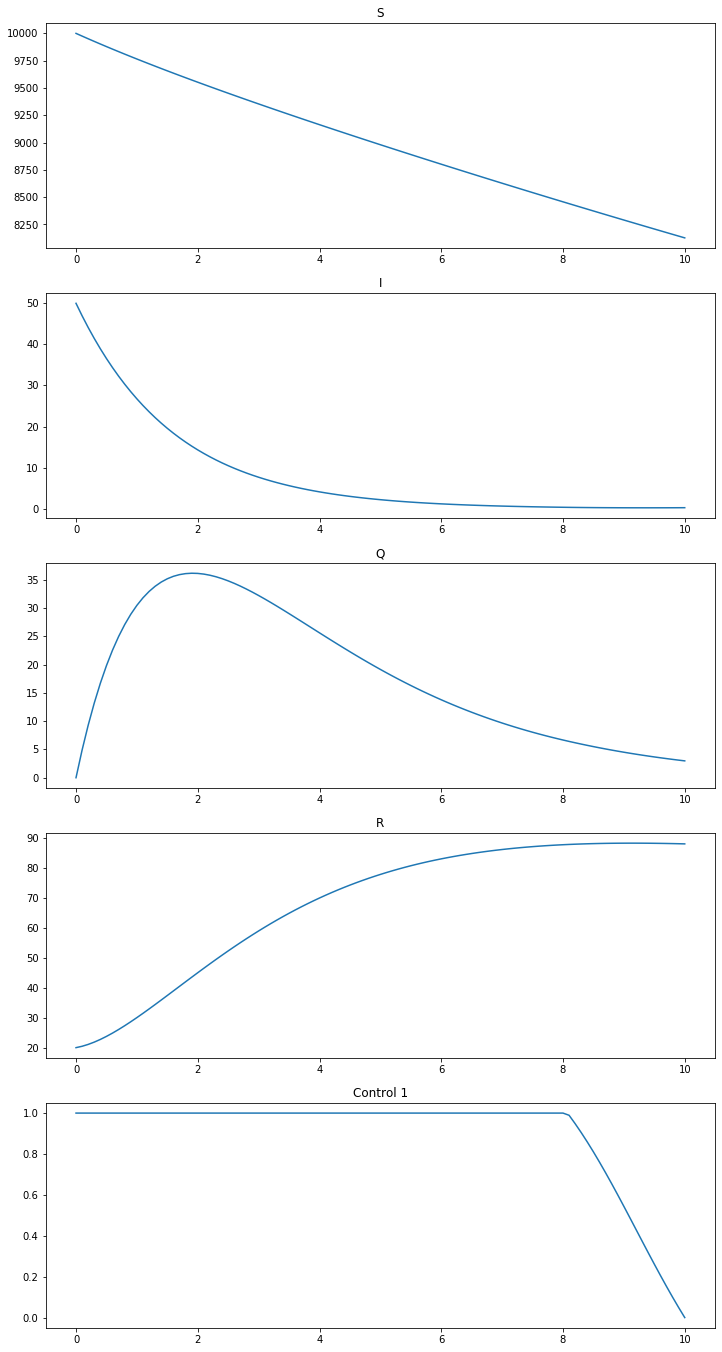

In [25]:
sX = list(sp.symbols('S I Q R'))
sAdj = list(sp.symbols('l1 l2 l3 l4'))
sU = [sp.symbols('u')]
sConst = list(sp.symbols('C A b d a1 g a2 e'))
fU = [sp.Max(0,sp.Min(1, (sAdj[2] - sAdj[1])/2))]
T = 10
final = [0,0,0,0]
initial = [10000,50,0,20]
const = [1, 1, 1, 0.02, 0.5, 0.1,0.01,0.4]
Problem = OC(H, sX, sAdj, sU, fU, sConst, const, T, initial, final)

X, U = Problem.plot('S','I','Q','R')

Iteration 1
The minimum is -1986.697207762299
Iteration 2
The minimum is -602.0270316145157
Iteration 3
The minimum is -172.83847560522162
Iteration 4
The minimum is -307.51447564353134
Iteration 5
The minimum is -586.5384834181303
Iteration 6
The minimum is -458.54937449834915
Iteration 7
The minimum is -294.06479940144897
Iteration 8
The minimum is -165.1192509934672
Iteration 9
The minimum is -86.1628264601837
Iteration 10
The minimum is -42.69880229694829
Iteration 11
The minimum is -19.92385287753519
Iteration 12
The minimum is -8.269195822074948
Iteration 13
The minimum is -2.3738781940104037
Iteration 14
The minimum is 0.026216134890509835


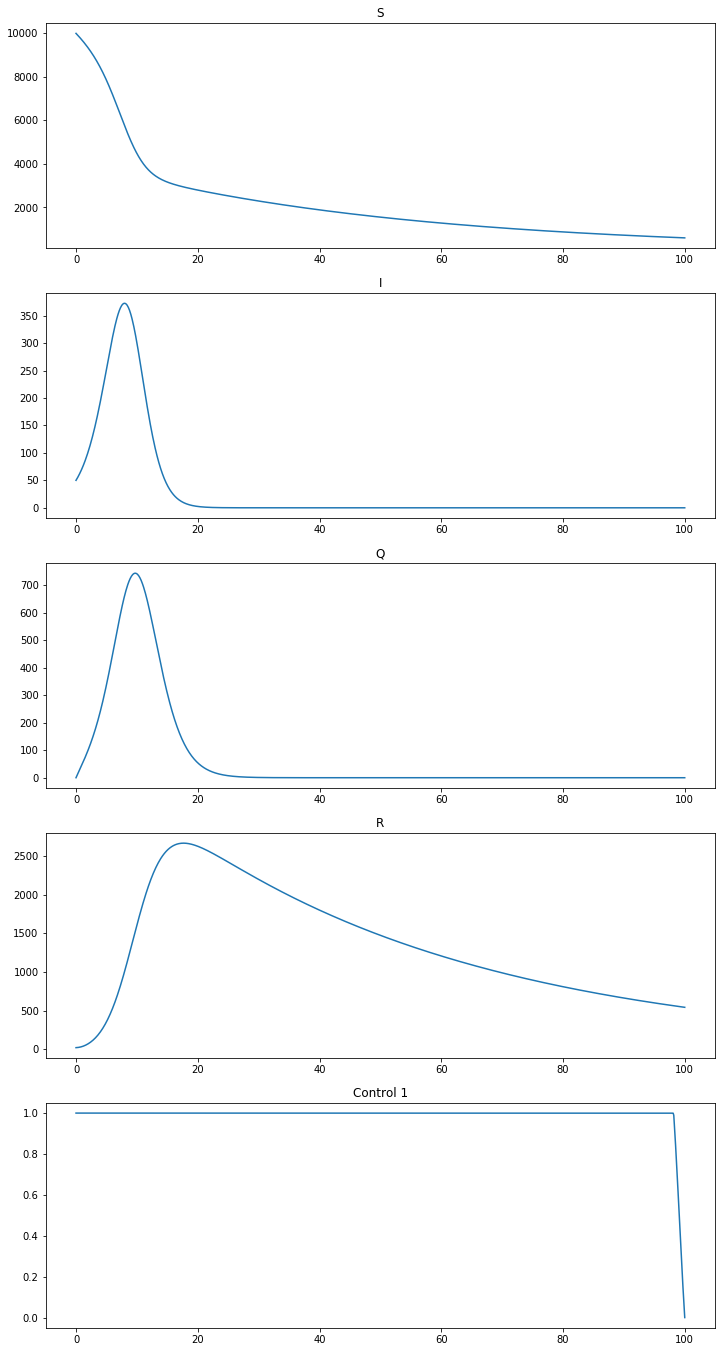

In [27]:
sX = list(sp.symbols('S I Q R'))
sAdj = list(sp.symbols('l1 l2 l3 l4'))
sU = [sp.symbols('u')]
sConst = list(sp.symbols('C A b d a1 g a2 e'))
fU = [sp.Max(0,sp.Min(1, (sAdj[2] - sAdj[1])/2))]
T = 100
final = [0,0,0,0]
initial = [10000,50,0,20]
const = [1, 1, 2, 0.02, 0.5, 0.1,0.01,0.4]
Problem = OC(H, sX, sAdj, sU, fU, sConst, const, T, initial, final)

X, U = Problem.plot('S','I','Q','R')